# Linear Algebra
## Matrix Multiplication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## "Standard" matrix multiplication
Matrix multiplication is NOT commutative, the order matters! $AB \neq BA$

Rules for matrix multiplication:
- The number of columns in the left matrix must be the same as the number of rows in the right matrix.
> Inner dimensions must match ($N, N$)
- The result will be a matrix with the same number of rows in the left matrix and the same number of columns in the right matrix.
> Outer dimensions is the size of resulting matrix ($M, K$)

$$\large
\begin{matrix}
\begin{bmatrix}
 &  &  &  &  & \\
 &  &  &  &  & \\
 &  &  &  &  & \\
 &  &  &  &  & 
\end{bmatrix} & \begin{bmatrix}
 & \\
 & \\
 & \\
 & \\
 & \\
 & 
\end{bmatrix} & = & \begin{bmatrix}
 & \\
 & \\
 & \\
 & 
\end{bmatrix}\\
M\times N & N\times K &  & M\times K
\end{matrix}
$$

### Element perspective matrix multiplication
Each element $c_{i,j}$ in $AB=C$ is the dot product between the $\text i^{th}$ row in $A$ and the $\text j^{th}$ column in $B$.

$$\large
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} =\begin{bmatrix}
1a+2c & 1b+2d\\
3a+4c & 3b+4d
\end{bmatrix}
$$

In [2]:
# Rules for multiplication validity
m = 4
n = 3
k = 6

# Make some matrices
A = np.round(np.random.randn(m,n)) # 4x3
B = np.round(np.random.randn(n,k)) # 3x6
C = np.round(np.random.randn(m,k)) # 4x6

# Test which multiplications are valid
# Think of your answer first, then test
print('A * B:')
print(np.matmul(A,B)), print() # yes

# np.matmul(A,A) # no

print('A.T * C:')
print(np.matmul(A.T,C)), print() # yes

print('B * B.T:')
print(np.matmul(B,B.T)), print() # yes

print('B.T * B:')
print(np.matmul(np.matrix.transpose(B),B)), print() # yes

# np.matmul(B,C) # no
# np.matmul(C,B) # no
# np.matmul(C.T,B) # no

print('C * B.T:')
print(np.matmul(C,B.T)) # yes

A * B:
[[ 1.  2. -1.  1. -1.  2.]
 [-1. -4.  0. -3. -2.  1.]
 [-2.  0.  4. -4.  2. -4.]
 [ 1.  2. -1.  0. -2.  3.]]

A.T * C:
[[-1.  2.  4. -3.  0. -2.]
 [ 1.  0. -1.  4. -2.  0.]
 [ 1. -3. -2.  1. -2.  3.]]

B * B.T:
[[ 3.  1.  1.]
 [ 1. 14. -4.]
 [ 1. -4.  6.]]

B.T * B:
[[ 1.  0. -2.  2. -1.  2.]
 [ 0.  4.  2. -2.  0.  0.]
 [-2.  2.  5. -5.  2. -4.]
 [ 2. -2. -5.  6. -1.  3.]
 [-1.  0.  2. -1.  2. -3.]
 [ 2.  0. -4.  3. -3.  5.]]

C * B.T:
[[ 3.  4.  0.]
 [ 0. -6.  4.]
 [ 3. -2.  0.]
 [ 1. -1. -1.]]


## Code challenge: matrix multiplication by layering
Implement matrix multiplication via layers.

1. Generate two matrices (A, B)
2. Build the product matrix layer-wise (for loops)
3. Implement the matrix multiplication directly (multiplying two matrices without a loop)
4. Compare results

In [3]:
# 1. Define matrices A & B
m = 4
n = 3
A = np.round(np.random.randn(m, n), 2)
B = np.round(np.random.randn(n, m), 2)
print(f"Matrix A:\n{A}"), print()
print(f"Matrix B:\n{B}"), print()


# 2. Build the product matrix layer-wise (for loops)
matrix = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        # matrix[i][j] = np.dot(A[i], B[:,j])
        matrix[i][j] = np.sum(A[i] * B[:,j])
        
# 3. Implement the matrix multiplication directly (multiplying two matrices without a loop)
# np_mult = A@B
np_mult = np.matmul(A, B)

# Compare results
print(f"Layer-wise matrix: \n{np.round(matrix, 2)}\n")
print(f"NumPy direct multiplication: \n{np.round(np_mult, 2)}")

Matrix A:
[[ 2.76  1.18  0.13]
 [ 0.27 -1.28 -0.3 ]
 [ 0.07  0.53 -0.65]
 [ 1.27 -0.37  0.06]]

Matrix B:
[[ 0.31  0.07  0.37 -1.38]
 [-0.96  0.45 -0.16  0.38]
 [-1.41  0.59 -1.48  0.28]]

Layer-wise matrix: 
[[-0.46  0.8   0.64 -3.32]
 [ 1.74 -0.73  0.75 -0.94]
 [ 0.43 -0.14  0.9  -0.08]
 [ 0.66 -0.04  0.44 -1.88]]

NumPy direct multiplication: 
[[-0.46  0.8   0.64 -3.32]
 [ 1.74 -0.73  0.75 -0.94]
 [ 0.43 -0.14  0.9  -0.08]
 [ 0.66 -0.04  0.44 -1.88]]


## Matrix-vector multiplication
When multiplying a matrix with a vector the result will always be a vector.

$$\large
 \begin{array}{l}
\begin{matrix}
A & \cdot  & w & = & v\\
m\times n &  & n\times 1 &  & m\times 1
\end{matrix} \ \ \ \ \ \ \ \ \ \ \begin{matrix}
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} & \begin{bmatrix}
2\\
3
\end{bmatrix} & = & \begin{bmatrix}
a2+b3\\
c2+d3
\end{bmatrix}\\
2\times 2 & 2\times 1 &  & 2\times 1
\end{matrix}\\
\\
\begin{matrix}
w^{T} & \cdot  & A & = & v\\
1\times m &  & m\times n &  & 1\times n
\end{matrix} \ \ \ \ \ \ \ \ \ \ \begin{matrix}
\begin{bmatrix}
2 & 3
\end{bmatrix} & \begin{bmatrix}
a & b\\
c & d
\end{bmatrix} & = & \begin{bmatrix}
a2+c3 & b2+d3
\end{bmatrix}\\
1\times 2 & 2\times 2 &  & 1\times 2
\end{matrix}
\end{array}
$$

Concept:
- $Aw$ &rightarrow; weighted combinations of the ***columns*** of A
- $w^{T}A$ &rightarrow; weighted combinations of the ***rows*** of A

In [4]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
w = np.array([0,1,2])

# Matrix-vector multiplication
print(f"Matrix-vector:\n{A@w}\n")
print(f"vector-Matrix:\n{w.T@A}")

Matrix-vector:
[ 8 17 26]

vector-Matrix:
[18 21 24]


## 2D transformation matrices

In [5]:
# Plot axis
def plot_axis(ax=3):
    plt.plot([-ax, ax],[0, 0],'k--')
    plt.plot([0, 0],[-ax, ax],'k--')
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc='upper left')
    plt.axis([-ax,ax,-ax,ax]);

#### Rotation + stretching

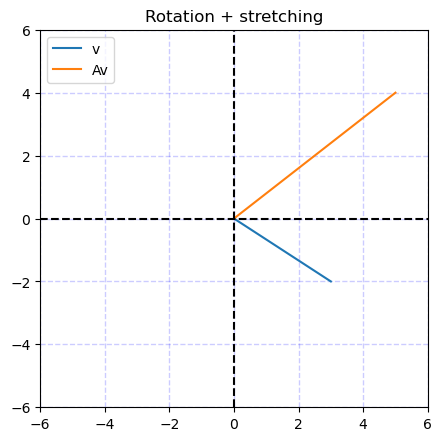

In [6]:
# 2D input vector
v = np.array([3, -2])

# 2x2 transformation matrix
A = np.array([[1,-1], [2,1]])

# Output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

# Plot them
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')
plt.title('Rotation + stretching')

# Plot axis
plot_axis(ax=6)
plt.show()

#### Pure rotation

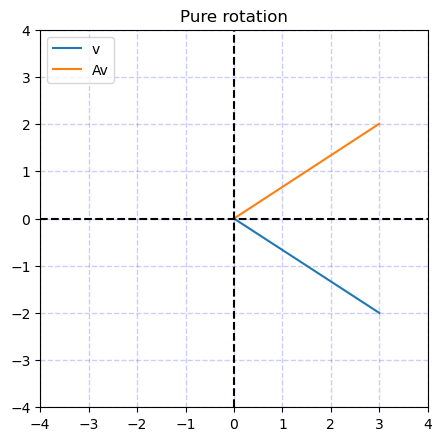

In [7]:
# 2D input vector
v = np.array([3, -2])

# 2x2 rotation matrix
th = 9*np.pi/24
A = np.array([[math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)]])

# Output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

# Plot them
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')
plt.title('Pure rotation')

# Plot axis
plot_axis(ax=4)
plt.show()

## Code challenge: Pure and impure rotation matrices
Investigate the relationship between the magnitude of the matrix-vector product and the theta (rotation angle) using the following rotation matrix.

In [8]:
# Plot graph
def plot_figure(theta, vecmag):
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(theta, vecmag, 'o-')
    plt.xlabel("Rotation angle (rad.)")
    plt.ylabel("Av magnitude")
    plt.legend(["Pure rotation", "Impure rotation"])
    plt.title("Pure vs Impure rotation")
    plt.show()

# Compute different rotation matrices
def rotation_matrix(size=100):
    # 2D input vector
    v = np.array([3, -2])
    
    # Init theta and matrices
    thetas = np.linspace(0, 2*np.pi, size)
    vecmags = np.zeros((len(thetas), 2))
    
    # For loop to plot different
    for i in range(len(thetas)):
        th = thetas[i]
        pure = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
        impure = np.array([[2*math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
        
        # Output vector is Av (convert v to column)
        vecmags[i,0] = np.linalg.norm(pure @ v.T)
        vecmags[i,1] = np.linalg.norm(impure @ v.T)

    # Plot them
    plot_figure(theta=thetas, vecmag=vecmags)

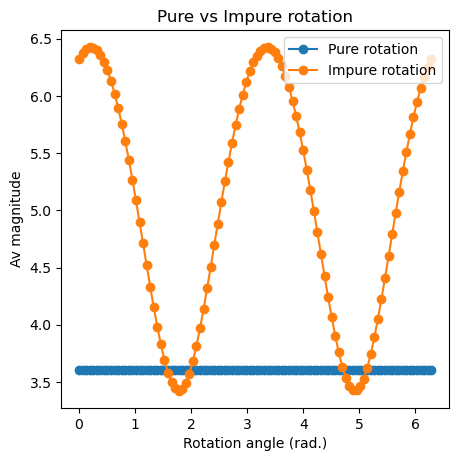

In [9]:
rotation_matrix(size=100)

## Code challenge: Geometric transformations via matrix multiplications
1. Generate X,Y coordinates for a circle
2. Plot circle
3. Create a 2x2 matrix (starting with Identity matrix)
4. Multiply matrix by coordinates
5. Plot new coordinates
6. Try with various matrices and singular matrix (columns form a linear dependent set)

In [10]:
def plot_circle(cir, newCir):
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(cir[:,0], cir[:,1], 'o')
    plt.plot(newCir[:,0], newCir[:,1], 'o')
    plt.axis('square')
    plt.show();

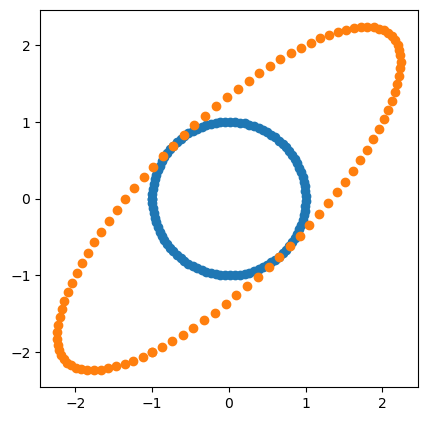

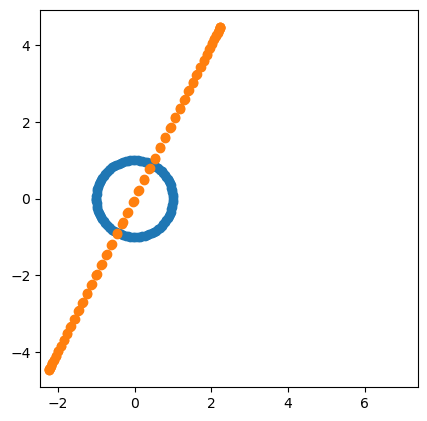

In [11]:
# 1. Generate X,Y coordinates for a circle
# 2. Plot circle
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# plot_circle(coord=xy)

# 3. Create a 2x2 matrix (starting with Identity matrix)
T = np.array([[1, 2], [2, 1]])

# 4. Multiply matrix by coordinates
newXY = xy@T

# 5. Plot new coordinates
plot_circle(cir=xy, newCir=newXY)

# 6. Try with various matrices and singular matrix (columns form a linear dependent set)
singular = np.array([[1, 2], [2, 4]])
sing = xy@singular
plot_circle(xy, sing)

## Additive and multiplicative matrix identities
Multiplicative Identity:

$\large
 \begin{array}{l}
AI=IA=A\\
A+I\neq A
\end{array}
$


Additive Identity:

$\large
 \begin{array}{l}
A0=0A\neq A\\
A+0=A
\end{array}
$

In [12]:
# Matrix size
n = 4

A = np.round(np.random.randn(n))
I = np.eye(n)
Z = np.zeros(n)

# Test both identities
print("A@I == A:  ", np.array_equal(A@I, A))
print("A == A@I:  ", np.array_equal(A, A@I))
print("A == A+I:  ", np.array_equal(A, A+I))
print("A == A+Z:  ", np.array_equal(A, A+Z))
print("A+Z == A@I:", np.array_equal(A+Z, A@I))

A@I == A:   True
A == A@I:   True
A == A+I:   False
A == A+Z:   True
A+Z == A@I: True


## Additive and multiplicative symmetric matrices
Symmetric matrix via the **additive** method:
$$\large
 \begin{array}{l}
S=\left( A+A^{T}\right) /2\\
S=S^{T}\\
\text{iff} \ A\ \text{is} \ n\times n\ \ \ \ \ \ \ \text{(if A is a square matrix)}\\
\\
\text{Example:}\\
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix} +\begin{bmatrix}
a & d & g\\
b & e & h\\
c & f & i
\end{bmatrix} =\begin{bmatrix}
a+a & b+d & c+g\\
b+d & e+e & h+f\\
c+g & h+f & i+i
\end{bmatrix}
\end{array}
$$

<br>

Multiplicative symmetric matrices ($A^{T}A$ and $AA^T$):
$$\large
 \begin{array}{l}
\underset{n\times m}{A^{T}} \ \underset{m\times n}{A} =\underset{n\times n}{S}\\
\\
\underset{m\times n}{A} \ \underset{n\times m}{A^{T}} =\underset{m\times m}{S}\\
\\
\text{Example:}\\
\begin{bmatrix}
a & b & c\\
d & e & f
\end{bmatrix}\begin{bmatrix}
a & d\\
b & e\\
c & f
\end{bmatrix} =\begin{bmatrix}
a^{2} +b^{2} +c^{2} & ad+be+cf\\
ad+be+cf & d^{2} +e^{2} +f^{2}
\end{bmatrix}
\end{array}
$$

In [13]:
# The additive method
# Specify sizes
m = 5
n = 5

# Create matrices
A = np.random.randn(m,n)
S = (A + A.T)/2

# A symmetric matrix minus its transpose should be all zeros
print(S-S.T)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [14]:
# The multiplicative method
# Specify sizes
m = 5
n = 3

# Create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# First, show that they are square
print(AtA.shape)
print(AAt.shape), print()

# Next, show that they are symmetric
print(AtA - AtA.T)
print(AAt - AAt.T)

(3, 3)
(5, 5)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Element-wise (Hadamard) multiplication
Multiplying each corresponding element of each matrix.

$$\large
\begin{bmatrix}
0 & 1 & 2\\
-1 & 6 & 3
\end{bmatrix} \odot \begin{bmatrix}
3 & 8 & 5\\
4 & 1 & -5
\end{bmatrix} =\begin{bmatrix}
0 & 8 & 10\\
-4 & 6 & -15
\end{bmatrix}
$$

In [15]:
# Sizes
m = 5
n = 2

# Two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# Note the differenct syntax compared to @ for matrix multiplication
C1 = np.multiply(A, B)
C2 = A*B

print(np.round(C1, 2)), print()
print(np.round(C2, 2)), print()
print(C1-C2)

[[-0.1   0.1 ]
 [ 0.47  0.77]
 [-0.11  0.26]
 [-0.1   0.28]
 [ 0.1   0.93]]

[[-0.1   0.1 ]
 [ 0.47  0.77]
 [-0.11  0.26]
 [-0.1   0.28]
 [ 0.1   0.93]]

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Quiz: Matrix operation equality
Consider matrices A, B, and C, all of size $4\times 6$. The * here indicates Hadamard multiplication. Do the following two operations give the same result? Why or why not? First think of your answer, then you can test it for random matrices in MATLAB or Python.

$
C(A+B)
\\
BC + CA
$

In [16]:
# Sizes
m = 2
n = 3

# Two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)
C = np.random.randn(m,n)

print(f"C(A+B):\n{np.round(C*(A+B), 2)}\n")
print(f"B*C + C*A:\n{np.round(B*C + C*A, 2)}")

C(A+B):
[[ 0.21  0.61  1.34]
 [-0.11 -1.18 -0.01]]

B*C + C*A:
[[ 0.21  0.61  1.34]
 [-0.11 -1.18 -0.01]]


## Code challenge: symmetry of combined symmetric matrices
What happens when two symmetric matrices are combined?
1. Create two symmetric matrices
2. Compute sum, multiplication, and Hadamard multiplication of the two matrices
3. Determine whether the result is still symmetric

In [17]:
# Two symmetric matrices
A = np.array([[1,2,3], [2,7,6], [3,6,9]])
B = np.array([[1,2,6], [2,8,4], [6,4,5]])

add = A + B
mult = A@B
had = A*B

print(f"Sum:\t\tYES, it's symmetric\n{add}\n")
print(f"Multiplication:\tNO, it's not symmetric\n{mult}\n")
print(f"Hadamard:\tYES, it's symmetric\n{had}")

Sum:		YES, it's symmetric
[[ 2  4  9]
 [ 4 15 10]
 [ 9 10 14]]

Multiplication:	NO, it's not symmetric
[[23 30 29]
 [52 84 70]
 [69 90 87]]

Hadamard:	YES, it's symmetric
[[ 1  4 18]
 [ 4 56 24]
 [18 24 45]]


## Multiplication of two symmetric matrices
The product of two symmetric matrices is not symmetric.

In [18]:
# Two symmetric matrices
A = np.array([[1,2,3], [2,7,6], [3,6,9]])
B = np.array([[1,2,6], [2,8,4], [6,4,5]])

mult = A@B

print(f"Multiplication:\tNO, it's not symmetric\n{mult}\n")

Multiplication:	NO, it's not symmetric
[[23 30 29]
 [52 84 70]
 [69 90 87]]



## Code challenge: standard and Hadamard multiplication for diagonal matrices
1. Create two matrices (3x3): "full" and diagonal matrix
2. Multiply each matrix by itself ($A\times A$): standard and hadamard multiplication

In [19]:
# 1. Create two matrices (3x3): "full" and diagonal matrix
A = np.random.randn(3, 3)
B = np.diag(np.random.randn(3))

# 2. Multiply each matrix by itself (A*A): standard and hadamard multiplication
stdA = A@A
hadA = A*A

stdB = B@B
hadB = B*B

print(f"Standard multiplication A:\n{np.round(stdA, 2)}\n")
print(f"Hadamard multiplication A:\n{np.round(hadA, 2)}\n")
print(f"Standard multiplication B:\n{np.round(stdB, 2)}\n")
print(f"Hadamard multiplication B:\n{np.round(hadB, 2)}")

Standard multiplication A:
[[ 0.19 -0.1   1.19]
 [-0.59  1.16  1.06]
 [-0.    0.17  1.51]]

Hadamard multiplication A:
[[0.04 0.47 0.06]
 [0.11 0.03 2.3 ]
 [0.1  0.36 0.67]]

Standard multiplication B:
[[0.06 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.2 ]]

Hadamard multiplication B:
[[0.06 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.2 ]]


## Code challenge: Fourier transform via matrix multiplication!
$$\large
 \begin{array}{l}
F_{j,k} =\omega ^{m}\\
w=e^{-2\pi \sqrt{-1/n}}\\
m=( j-1)( k-1)\\
X=Fx
\end{array}
$$

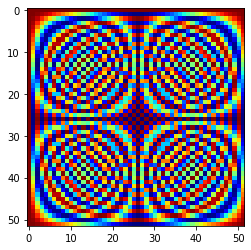

X1 == X2: True


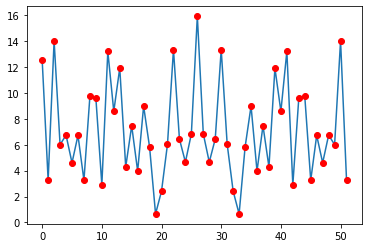

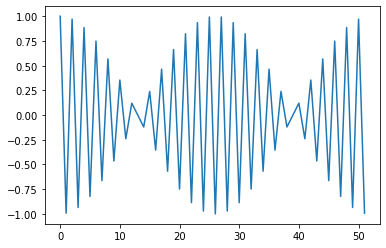

In [20]:
# Define Fourier matrix
n = 52
F = np.zeros((n,n), dtype=np.complex_)
w = np.e**(-2*np.pi*1j/n)

# Compute Fourier matrix
for j in range(1, n+1):
    for k in range(1, n+1):
        m = (j-1)*(k-1)
        F[j-1][k-1] = w**m

# Fourier image
plt.imshow(F.real, cmap='jet')
plt.show()

# Define vector
x = np.random.randn(n)

# Multiplication
X1 = F@x
X2 = np.fft.fft(x)
print(f'X1 == X2: {np.allclose(X1, X2)}')

# Plot them
plt.figure()
plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()
plt.plot(F.real[:,25])
plt.show()